In [2]:
from pyod.utils.data import generate_data
import matplotlib.pyplot as plt
import numpy as np
from pyod.models.knn import KNN
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, roc_curve, auc

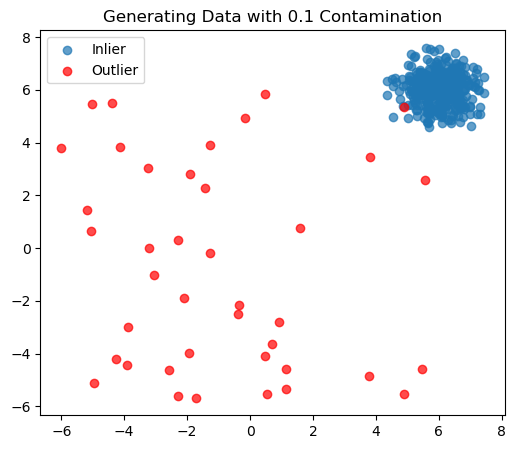

In [8]:
# Ex. 1
# Use the generate data() function from pyod.utils.data to generate a 2-dimensional dataset with 500 normal samples
# (400 training samples and 100 test samples) with a contamination rate of 0.1.
# Use pyplot.scatter() function to plot the training samples, choosing a different color for the outliers.

# generating the 2-dimensional dataset with the generate_data() function
# 400 training samples, 100 test samples, contamination rate 0.1
train_data, test_data, train_labels, test_labels = generate_data(n_train=400, n_test=100, n_features=2, contamination=0.1)

# plotting the samples
plt.figure(figsize=(6, 5))

# plotting the inliers
plt.scatter(train_data[train_labels == 0, 0],
            train_data[train_labels == 0, 1],
            label="Inlier", alpha=0.7)

# plotting the outliers
plt.scatter(train_data[train_labels == 1, 0],
            train_data[train_labels == 1, 1],
            label="Outlier", color="red", alpha=0.7)

plt.title("Generating Data with 0.1 Contamination")
plt.legend()
plt.show()

Confusion Matrix for Training Data:
 [[359   1]
 [  1  39]]
Confusion Matrix for Test Data:
 [[88  2]
 [ 0 10]]
Balanced Accuracy for Training Data: 0.986
Balanced Accuracy for Test Data:  0.989


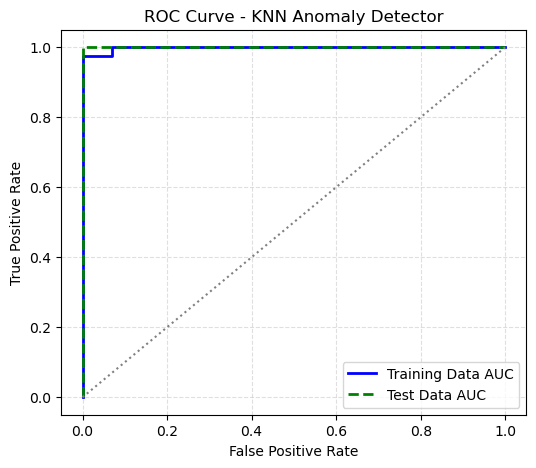

Confusion Matrix for Training Data:
 [[324  36]
 [  0  40]]
Confusion Matrix for Test Data:
 [[78 12]
 [ 0 10]]
Balanced Accuracy for Training Data: 0.950
Balanced Accuracy for Test Data:  0.933


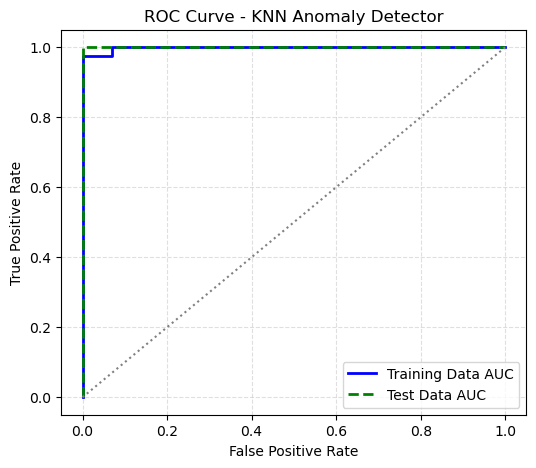

In [18]:
# Ex. 2
# Choose a model from pyod (ex: KNN), leave all the parameters default (except the contamination, which will match the
# contamination used for dataset generation) and fit it with the training data. Get the predictions of the model
# for both the training and the testing data. Use the confusion matrix function from sklearn.metrics to find the
# number of TN, TP, FN and FP and compute the balanced accuracy.
# Use the roc curve() function from sklearn.metrics to compute the ROC curve and then plot it with plot() function.
# Change the contamination rate used by the model and see how the reported metrics change.

contaminations = [0.1, 0.2]

# fitting the K-NN model with the training data from above and contamination 0.1
for c in contaminations:
    model = KNN(contamination=c)
    model.fit(train_data)
    
    # getting the model's predictions (0 = inlier, 1 = outlier)
    train_labels_pred = model.predict(train_data)    # predictions on training set
    test_labels_pred = model.predict(test_data)      # predictions on test set
    
    # using the confusion_matrix() function to get the confusion matrix for the dataset
    cm_train = confusion_matrix(train_labels, train_labels_pred)
    cm_test  = confusion_matrix(test_labels, test_labels_pred)
    print("Confusion Matrix for Training Data:\n", cm_train)
    print("Confusion Matrix for Test Data:\n", cm_test)
    
    # computing the balanced accuracy
    ba_train = balanced_accuracy_score(train_labels, train_labels_pred)
    ba_test  = balanced_accuracy_score(test_labels, test_labels_pred)
    print(f"Balanced Accuracy for Training Data: {ba_train:.3f}")
    print(f"Balanced Accuracy for Test Data:  {ba_test:.3f}")
    
    # getting anomaly scores from model
    train_scores = model.decision_function(train_data)
    test_scores  = model.decision_function(test_data)
    
    # computing ROC curve and AUC for both train and test data
    fpr_train, tpr_train, _ = roc_curve(train_labels, train_scores)
    fpr_test,  tpr_test,  _ = roc_curve(test_labels,  test_scores)
    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_test  = auc(fpr_test,  tpr_test)
    
    # plotting ROC curves
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_train, tpr_train, color='blue', linestyle='-', label="Training Data AUC", lw=2)
    plt.plot(fpr_test, tpr_test, color='green', linestyle='--', label="Test Data AUC", lw=2)
    plt.plot([0, 1], [0, 1], color='gray', linestyle=':', lw=1.5)  # diagonal baseline
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - KNN Anomaly Detector")
    plt.legend()
    plt.grid(alpha=0.4, linestyle='--')
    plt.show()

In [19]:
# Ex. 3
# Generate a unidimensional dataset with 10 % contamination rate, 1000 training samples and no testing samples using
# generate data(). Try to detect the anomalies in the dataset by using the Z-scores. In order to do that you should
# compute the Z-score threshold that would classify the given percent (contamination rate) of data as anomalies
# (use np.quantile() function). Compute the balanced accuracy of the designed method.

# generating the dataset with 1000 training samples, no testing samples and a 10% contamination rate
train_data, _, train_labels, _ = generate_data(n_train=1000, n_test=0, n_features=1, contamination=0.1)

# computing the z-scores
mu = train_data.mean()
sigma = train_data.std()
z_scores = (train_data - mu) / sigma

# setting threshold for anomalies
threshold = np.quantile(np.abs(z_scores), 0.9)

# detecting anomalies
pred_labels = (np.abs(z_scores) > threshold).astype(int)

# computing balanced accuracy
BA = balanced_accuracy_score(train_labels, pred_labels)
print(f"Balanced Accuracy: {BA:.2f}")

Balanced Accuracy: 0.92
